### 0 Setup

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1 Probability

#### 1.1
You have a csv table of daily returns for your stock and for S&P-500 ("spy" ticker). For each file, read them into a pandas frame and add a column "True Label". In that column, for each day (row) i with daily return ri >= 0 you assign a " + " label ("up day"). For each day i with daily return ri < 0 you assign " - " ("down days"). You do this for every day for all 5 years both both tickers.

In [3]:
spy = pd.read_csv('SPY.csv', usecols = ['Date','Year','Month','Day','Weekday','Return'])
spy['Ticker'] = 'SPY' 
spy['True Label'] = np.where(spy['Return'] < 0, '-', '+')
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+


In [4]:
msft = pd.read_csv('MSFT.csv', usecols = ['Date','Year','Month','Day','Weekday','Return'])
msft['Ticker'] = 'MSFT'
msft['True Label'] = np.where(msft['Return'] < 0, '-', '+')
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-


#### 1.2
Compute the default probability P* that the next day is a "up" day.

In [5]:
# calculate the trading days per year
spy_days_df = pd.DataFrame(columns=['Year','Trading Days'])

yr_l = []
days_l = []
spy_grouped = spy.groupby('Year')['Date'].count()
for yr in spy_grouped.index:
    yr_l.append(yr)
    days_l.append(spy_grouped.loc[yr])

spy_days_df['Year'] = yr_l
spy_days_df['Trading Days'] = days_l
spy_days_df 

,Year,Trading Days
0,2014,252
1,2015,252
2,2016,252
3,2017,251
4,2018,251
5,2019,252


In [6]:
spy = spy.merge(spy_days_df, how='left', on='Year')
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252


In [7]:
spy['Pos'] = np.where(spy['True Label'] == '+',1,0)
spy['Neg'] = np.where(spy['Pos'] == 0, 1,0)
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252,1,0
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252,0,1
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252,0,1
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0


In [8]:
# probability that next day is an up day 
up_prob = spy.groupby('Year')['Pos'].sum() / spy.groupby('Year')['Trading Days'].min()
up_prob


Year
2014    0.595238
2015    0.480159
2016    0.547619
2017    0.573705
2018    0.537849
2019    0.595238
dtype: float64

In [9]:
# calculate the trading days per year
msft_days_df = pd.DataFrame(columns=['Year','Trading Days'])

yr_l = []
days_l = []
msft_grouped = msft.groupby('Year')['Date'].count()
for yr in msft_grouped.index:
    yr_l.append(yr)
    days_l.append(msft_grouped.loc[yr])

msft_days_df['Year'] = yr_l
msft_days_df['Trading Days'] = days_l
msft_days_df 

,Year,Trading Days
0,2014,252
1,2015,252
2,2016,252
3,2017,251
4,2018,251
5,2019,252


In [10]:
msft = msft.merge(msft_days_df, how='left', on='Year')
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252


In [11]:
msft['Pos'] = np.where(msft['True Label'] == '+',1,0)
msft['Neg'] = np.where(msft['Pos'] == 0, 1,0)
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252,1,0
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252,0,1
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252,0,1
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252,0,1


In [12]:
# probability that next day is an up day 
up_prob = msft.groupby('Year')['Pos'].sum() / msft.groupby('Year')['Trading Days'].min()
up_prob


Year
2014    0.519841
2015    0.507937
2016    0.527778
2017    0.569721
2018    0.557769
2019    0.595238
dtype: float64

#### 1.3
For years 1, 2, and 3 - what is the probability that after seeing *k* consecutive "down days", the next day is still an up day". Compute this for *k* = 1,2,3.

In [13]:
spy['Next Day'] = spy.groupby('Year')['True Label'].shift(-1)
spy['1 Day Ago'] = spy.groupby('Year')['True Label'].shift(+1)
spy['2 Days Ago'] = spy.groupby('Year')['True Label'].shift(+2)
spy['3 Days Ago'] = spy.groupby('Year')['True Label'].shift(+3)
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252,1,0,-,NaN,NaN,NaN
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252,0,1,-,+,NaN,NaN
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252,0,1,+,-,+,NaN
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-


In [14]:
msft['Next Day'] = msft.groupby('Year')['True Label'].shift(-1)
msft['1 Day Ago'] = msft.groupby('Year')['True Label'].shift(+1)
msft['2 Days Ago'] = msft.groupby('Year')['True Label'].shift(+2)
msft['3 Days Ago'] = msft.groupby('Year')['True Label'].shift(+3)
msft.head()


,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252,1,0,-,NaN,NaN,NaN
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252,0,1,-,+,NaN,NaN
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252,0,1,+,-,+,NaN
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252,0,1,-,+,-,-


probability when k=1

In [15]:
spy_k1 = (spy['True Label'] == '+') & (spy['1 Day Ago'] == '-')
spy[spy_k1]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+
8,2014-01-14,2014,1,14,Tuesday,0.010898,SPY,+,252,1,0,+,-,+,+
12,2014-01-21,2014,1,21,Tuesday,0.002941,SPY,+,252,1,0,+,-,-,+
17,2014-01-28,2014,1,28,Tuesday,0.005955,SPY,+,252,1,0,-,-,-,-
19,2014-01-30,2014,1,30,Thursday,0.010601,SPY,+,252,1,0,-,-,+,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,2019-11-12,2019,11,12,Tuesday,0.002108,SPY,+,252,1,0,+,-,+,+
1484,2019-11-22,2019,11,22,Friday,0.002224,SPY,+,252,1,0,+,-,-,-
1491,2019-12-04,2019,12,4,Wednesday,0.006170,SPY,+,252,1,0,+,-,-,-
1496,2019-12-11,2019,12,11,Wednesday,0.002839,SPY,+,252,1,0,+,-,-,+


In [16]:
spy_prob_k1 = spy[spy_k1].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k1

Year
2014    0.257937
2015    0.261905
2016    0.293651
2017    0.262948
2018    0.235060
2019    0.226190
Name: Date, dtype: float64

In [17]:
msft_k1 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '-')
msft[msft_k1]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+
6,2014-01-10,2014,1,10,Friday,0.014354,MSFT,+,252,1,0,-,-,-,+
8,2014-01-14,2014,1,14,Tuesday,0.022870,MSFT,+,252,1,0,+,-,+,-
14,2014-01-23,2014,1,23,Thursday,0.003618,MSFT,+,252,1,0,+,-,-,-
17,2014-01-28,2014,1,28,Tuesday,0.006661,MSFT,+,252,1,0,+,-,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2019-12-04,2019,12,4,Wednesday,0.003617,MSFT,+,252,1,0,+,-,-,-
1496,2019-12-11,2019,12,11,Wednesday,0.003771,MSFT,+,252,1,0,+,-,-,+
1502,2019-12-19,2019,12,19,Thursday,0.008680,MSFT,+,252,1,0,+,-,-,+
1506,2019-12-26,2019,12,26,Thursday,0.008197,MSFT,+,252,1,0,+,-,+,+


In [18]:
msft_prob_k1 = msft[msft_k1].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k1

Year
2014    0.234127
2015    0.246032
2016    0.269841
2017    0.258964
2018    0.282869
2019    0.238095
Name: Date, dtype: float64

probability when k=2

In [19]:
spy_k2 = (spy['True Label'] == '+') & (spy['1 Day Ago'] == '-') & (spy['2 Days Ago'] == '-')
spy[spy_k2]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+
12,2014-01-21,2014,1,21,Tuesday,0.002941,SPY,+,252,1,0,+,-,-,+
17,2014-01-28,2014,1,28,Tuesday,0.005955,SPY,+,252,1,0,-,-,-,-
22,2014-02-04,2014,2,4,Tuesday,0.007004,SPY,+,252,1,0,-,-,-,+
47,2014-03-12,2014,3,12,Wednesday,0.000267,SPY,+,252,1,0,-,-,-,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2019-10-09,2019,10,9,Wednesday,0.009496,SPY,+,252,1,0,+,-,-,+
1484,2019-11-22,2019,11,22,Friday,0.002224,SPY,+,252,1,0,+,-,-,-
1491,2019-12-04,2019,12,4,Wednesday,0.006170,SPY,+,252,1,0,+,-,-,-
1496,2019-12-11,2019,12,11,Wednesday,0.002839,SPY,+,252,1,0,+,-,-,+


In [20]:
spy_prob_k2 = spy[spy_k2].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k2

Year
2014    0.107143
2015    0.146825
2016    0.099206
2017    0.111554
2018    0.107570
2019    0.115079
Name: Date, dtype: float64

In [21]:
msft_k2 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '-') & (msft['2 Days Ago'] == '-')
msft[msft_k2]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+
6,2014-01-10,2014,1,10,Friday,0.014354,MSFT,+,252,1,0,-,-,-,+
14,2014-01-23,2014,1,23,Thursday,0.003618,MSFT,+,252,1,0,+,-,-,-
24,2014-02-06,2014,2,6,Thursday,0.010050,MSFT,+,252,1,0,+,-,-,-
38,2014-02-27,2014,2,27,Thursday,0.010408,MSFT,+,252,1,0,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,2019-11-07,2019,11,7,Thursday,0.001388,MSFT,+,252,1,0,+,-,-,+
1484,2019-11-22,2019,11,22,Friday,0.000736,MSFT,+,252,1,0,+,-,-,+
1491,2019-12-04,2019,12,4,Wednesday,0.003617,MSFT,+,252,1,0,+,-,-,-
1496,2019-12-11,2019,12,11,Wednesday,0.003771,MSFT,+,252,1,0,+,-,-,+


In [22]:
msft_prob_k2 = msft[msft_k2].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k2

Year
2014    0.130952
2015    0.134921
2016    0.107143
2017    0.095618
2018    0.107570
2019    0.130952
Name: Date, dtype: float64

probability when k=3

In [23]:
spy_k3= (spy['True Label'] == '+') & (spy['1 Day Ago'] == '+') & (spy['2 Days Ago'] == '-') & (spy['3 Days Ago'] == '-')
spy[spy_k3]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-
13,2014-01-22,2014,1,22,Wednesday,0.000651,SPY,+,252,1,0,-,+,-,-
51,2014-03-18,2014,3,18,Tuesday,0.007138,SPY,+,252,1,0,-,+,-,-
60,2014-03-31,2014,3,31,Monday,0.008195,SPY,+,252,1,0,+,+,-,-
67,2014-04-09,2014,4,9,Wednesday,0.010751,SPY,+,252,1,0,-,+,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2019-10-04,2019,10,4,Friday,0.013532,SPY,+,252,1,0,-,+,-,-
1453,2019-10-10,2019,10,10,Thursday,0.006763,SPY,+,252,1,0,+,+,-,-
1485,2019-11-25,2019,11,25,Monday,0.007750,SPY,+,252,1,0,+,+,-,-
1492,2019-12-05,2019,12,5,Thursday,0.001798,SPY,+,252,1,0,+,+,-,-


In [24]:
spy_prob_k3 = spy[spy_k3].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k3

Year
2014    0.055556
2015    0.075397
2016    0.059524
2017    0.071713
2018    0.051793
2019    0.059524
Name: Date, dtype: float64

In [25]:
msft_k3 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '+') & (msft['2 Days Ago'] == '-') & (msft['3 Days Ago'] == '-')
msft[msft_k3]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
15,2014-01-24,2014,1,24,Friday,0.020798,MSFT,+,252,1,0,-,+,-,-
25,2014-02-07,2014,2,7,Friday,0.010504,MSFT,+,252,1,0,+,+,-,-
39,2014-02-28,2014,2,28,Friday,0.011886,MSFT,+,252,1,0,-,+,-,-
47,2014-03-12,2014,3,12,Wednesday,0.006576,MSFT,+,252,1,0,-,+,-,-
51,2014-03-18,2014,3,18,Tuesday,0.039422,MSFT,+,252,1,0,-,+,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2019-11-08,2019,11,8,Friday,0.011784,MSFT,+,252,1,0,+,+,-,-
1485,2019-11-25,2019,11,25,Monday,0.010963,MSFT,+,252,1,0,+,+,-,-
1492,2019-12-05,2019,12,5,Thursday,0.000534,MSFT,+,252,1,0,+,+,-,-
1497,2019-12-12,2019,12,12,Thursday,0.010152,MSFT,+,252,1,0,+,+,-,-


In [26]:
msft_prob_k3 = msft[msft_k3].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k3

Year
2014    0.075397
2015    0.063492
2016    0.047619
2017    0.031873
2018    0.043825
2019    0.091270
Name: Date, dtype: float64

#### 1.4
For years 1, 2, and 3 - what is the probability that after seeing *k* consecutive "up days", the next day is still an "up day". Compute this for *k* = 1,2,3.

probability when k=1

In [27]:
spy_k1 = (spy['True Label'] == '+') & (spy['1 Day Ago'] == '+')
spy[spy_k1]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-
5,2014-01-09,2014,1,9,Thursday,0.000654,SPY,+,252,1,0,+,+,+,-
6,2014-01-10,2014,1,10,Friday,0.002722,SPY,+,252,1,0,-,+,+,+
9,2014-01-15,2014,1,15,Wednesday,0.005390,SPY,+,252,1,0,-,+,-,+
13,2014-01-22,2014,1,22,Wednesday,0.000651,SPY,+,252,1,0,-,+,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,2019-12-19,2019,12,19,Thursday,0.004099,SPY,+,252,1,0,+,+,+,+
1503,2019-12-20,2019,12,20,Friday,0.004384,SPY,+,252,1,0,+,+,+,+
1504,2019-12-23,2019,12,23,Monday,0.001528,SPY,+,252,1,0,+,+,+,+
1505,2019-12-24,2019,12,24,Tuesday,0.000031,SPY,+,252,1,0,+,+,+,+


In [28]:
spy_prob_k1 = spy[spy_k1].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k1

Year
2014    0.333333
2015    0.218254
2016    0.253968
2017    0.306773
2018    0.298805
2019    0.365079
Name: Date, dtype: float64

In [29]:
msft_k1 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '+')
msft[msft_k1]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
9,2014-01-15,2014,1,15,Wednesday,0.027389,MSFT,+,252,1,0,+,+,-,+
10,2014-01-16,2014,1,16,Thursday,0.003537,MSFT,+,252,1,0,-,+,+,-
15,2014-01-24,2014,1,24,Friday,0.020798,MSFT,+,252,1,0,-,+,-,-
18,2014-01-29,2014,1,29,Wednesday,0.010753,MSFT,+,252,1,0,+,+,-,+
19,2014-01-30,2014,1,30,Thursday,0.005455,MSFT,+,252,1,0,+,+,+,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2019-12-13,2019,12,13,Friday,0.008418,MSFT,+,252,1,0,+,+,+,-
1499,2019-12-16,2019,12,16,Monday,0.006471,MSFT,+,252,1,0,-,+,+,+
1503,2019-12-20,2019,12,20,Friday,0.010918,MSFT,+,252,1,0,+,+,-,-
1504,2019-12-23,2019,12,23,Monday,0.000000,MSFT,+,252,1,0,-,+,+,-


In [30]:
msft_prob_k1 = msft[msft_k1].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k1

Year
2014    0.281746
2015    0.257937
2016    0.257937
2017    0.306773
2018    0.270916
2019    0.357143
Name: Date, dtype: float64

probability when k=2

In [31]:
spy_k2 = (spy['True Label'] == '+') & (spy['1 Day Ago'] == '+') & (spy['2 Days Ago'] == '+')
spy[spy_k2]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
5,2014-01-09,2014,1,9,Thursday,0.000654,SPY,+,252,1,0,+,+,+,-
6,2014-01-10,2014,1,10,Friday,0.002722,SPY,+,252,1,0,-,+,+,+
26,2014-02-10,2014,2,10,Monday,0.001836,SPY,+,252,1,0,+,+,+,-
27,2014-02-11,2014,2,11,Tuesday,0.010944,SPY,+,252,1,0,+,+,+,+
28,2014-02-12,2014,2,12,Wednesday,0.000494,SPY,+,252,1,0,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,2019-12-19,2019,12,19,Thursday,0.004099,SPY,+,252,1,0,+,+,+,+
1503,2019-12-20,2019,12,20,Friday,0.004384,SPY,+,252,1,0,+,+,+,+
1504,2019-12-23,2019,12,23,Monday,0.001528,SPY,+,252,1,0,+,+,+,+
1505,2019-12-24,2019,12,24,Tuesday,0.000031,SPY,+,252,1,0,+,+,+,+


In [32]:
spy_prob_k2 = spy[spy_k2].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k2

Year
2014    0.194444
2015    0.095238
2016    0.115079
2017    0.155378
2018    0.163347
2019    0.234127
Name: Date, dtype: float64

In [33]:
msft_k2 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '+') & (msft['2 Days Ago'] == '+')
msft[msft_k2]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
10,2014-01-16,2014,1,16,Thursday,0.003537,MSFT,+,252,1,0,-,+,+,-
19,2014-01-30,2014,1,30,Thursday,0.005455,MSFT,+,252,1,0,+,+,+,-
20,2014-01-31,2014,1,31,Friday,0.026587,MSFT,+,252,1,0,-,+,+,+
26,2014-02-10,2014,2,10,Monday,0.006565,MSFT,+,252,1,0,+,+,+,-
27,2014-02-11,2014,2,11,Tuesday,0.010054,MSFT,+,252,1,0,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2019-11-27,2019,11,27,Wednesday,0.001908,MSFT,+,252,1,0,-,+,+,+
1493,2019-12-06,2019,12,6,Friday,0.012139,MSFT,+,252,1,0,-,+,+,-
1498,2019-12-13,2019,12,13,Friday,0.008418,MSFT,+,252,1,0,+,+,+,-
1499,2019-12-16,2019,12,16,Monday,0.006471,MSFT,+,252,1,0,-,+,+,+


In [34]:
msft_prob_k2 = msft[msft_k2].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k2

Year
2014    0.154762
2015    0.130952
2016    0.130952
2017    0.187251
2018    0.143426
2019    0.210317
Name: Date, dtype: float64

probability when k=3

In [35]:
spy_k3= (spy['True Label'] == '+') & (spy['1 Day Ago'] == '+') & (spy['2 Days Ago'] == '+') & (spy['3 Days Ago'] == '+')
spy[spy_k3]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
6,2014-01-10,2014,1,10,Friday,0.002722,SPY,+,252,1,0,-,+,+,+
27,2014-02-11,2014,2,11,Tuesday,0.010944,SPY,+,252,1,0,+,+,+,+
28,2014-02-12,2014,2,12,Wednesday,0.000494,SPY,+,252,1,0,+,+,+,+
29,2014-02-13,2014,2,13,Thursday,0.005163,SPY,+,252,1,0,+,+,+,+
30,2014-02-14,2014,2,14,Friday,0.005519,SPY,+,252,1,0,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,2019-12-19,2019,12,19,Thursday,0.004099,SPY,+,252,1,0,+,+,+,+
1503,2019-12-20,2019,12,20,Friday,0.004384,SPY,+,252,1,0,+,+,+,+
1504,2019-12-23,2019,12,23,Monday,0.001528,SPY,+,252,1,0,+,+,+,+
1505,2019-12-24,2019,12,24,Tuesday,0.000031,SPY,+,252,1,0,+,+,+,+


In [36]:
spy_prob_k3 = spy[spy_k3].groupby('Year')['Date'].count() / spy.groupby('Year')['Date'].count()
spy_prob_k3

Year
2014    0.107143
2015    0.035714
2016    0.043651
2017    0.091633
2018    0.067729
2019    0.126984
Name: Date, dtype: float64

In [37]:
msft_k3 = (msft['True Label'] == '+') & (msft['1 Day Ago'] == '+') & (msft['2 Days Ago'] == '+') & (msft['3 Days Ago'] == '+')
msft[msft_k3]

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago
20,2014-01-31,2014,1,31,Friday,0.026587,MSFT,+,252,1,0,-,+,+,+
27,2014-02-11,2014,2,11,Tuesday,0.010054,MSFT,+,252,1,0,+,+,+,+
28,2014-02-12,2014,2,12,Wednesday,0.008071,MSFT,+,252,1,0,+,+,+,+
29,2014-02-13,2014,2,13,Thursday,0.003736,MSFT,+,252,1,0,+,+,+,+
30,2014-02-14,2014,2,14,Friday,0.000266,MSFT,+,252,1,0,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2019-11-15,2019,11,15,Friday,0.012900,MSFT,+,252,1,0,+,+,+,+
1480,2019-11-18,2019,11,18,Monday,0.002467,MSFT,+,252,1,0,+,+,+,+
1481,2019-11-19,2019,11,19,Tuesday,0.000333,MSFT,+,252,1,0,-,+,+,+
1487,2019-11-27,2019,11,27,Wednesday,0.001908,MSFT,+,252,1,0,-,+,+,+


In [38]:
msft_prob_k3 = msft[msft_k3].groupby('Year')['Date'].count() / msft.groupby('Year')['Date'].count()
msft_prob_k3

Year
2014    0.099206
2015    0.059524
2016    0.071429
2017    0.119522
2018    0.075697
2019    0.123016
Name: Date, dtype: float64

### 2 Past Performance Models

2.1 and 2.2 are both completed together in this section. The accuracy (2.2) is calculated towards the end of each *w* section.


In [39]:
# handle NaNs so we can concantenate the sequences
spy[['1 Day Ago', '2 Days Ago','3 Days Ago']] = spy[['1 Day Ago', '2 Days Ago','3 Days Ago']].fillna('0')
msft[['1 Day Ago', '2 Days Ago','3 Days Ago']] = msft[['1 Day Ago', '2 Days Ago','3 Days Ago']].fillna('0')

##### W=2 (SPY)

In [40]:
spy['w2'] = spy['1 Day Ago'] + spy['True Label']
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252,1,0,-,0,0,0,0+
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252,0,1,-,+,0,0,+-
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252,0,1,+,-,+,0,--
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+,-+
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-,++


In [41]:
# create a reference table of sequence frequencies
spy_ref = spy[['Year','Ticker','w2','Date','Next Day']].groupby(['Year','Ticker','w2','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w2 Freq'})
spy_ref = spy_ref.loc[spy_ref['Year'] < 2017]
spy_ref = spy_ref.groupby(['w2','Next Day'])['w2 Freq'].sum().reset_index()
spy_ref.head()

,w2,Next Day,w2 Freq
0,++,+,102
1,++,-,101
2,+-,+,115
3,+-,-,91
4,-+,+,101


In [42]:
# create a prediction table for spy based on the reference tables
spy_pred = spy_ref.groupby(['w2','Next Day'])[['Next Day','w2 Freq']].sum().unstack()['w2 Freq']
spy_pred['w2 Pred'] = np.where(spy_pred['+'] > spy_pred['-'], '+', '-')
spy_pred = spy_pred.reset_index()
spy_pred = spy_pred[['w2','w2 Pred']]
spy_pred # 'Next Day' is the index

Next Day,w2,w2 Pred
0,++,+
1,+-,+
2,-+,-
3,--,+
4,0+,-
5,0-,-


In [43]:
# create a testing dataset for spy
spy_test = spy[['Date','Year','True Label','Next Day','w2']].loc[spy['Year'] > 2016]
spy_test.head()

,Date,Year,True Label,Next Day,w2
756,2017-01-03,2017,+,+,0+
757,2017-01-04,2017,+,-,++
758,2017-01-05,2017,-,+,+-
759,2017-01-06,2017,+,-,-+
760,2017-01-09,2017,-,+,+-


In [44]:
# add predictions to spy test dataset
spy_test = spy_test.merge(spy_pred)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred
0,2017-01-03,2017,+,+,0+,-
1,2018-01-02,2018,+,+,0+,-
2,2019-01-02,2019,+,-,0+,-
3,2017-01-04,2017,+,-,++,+
4,2017-01-11,2017,+,-,++,+


In [45]:
spy_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred
749,2019-11-21,2019,-,+,--,+
750,2019-12-02,2019,-,-,--,+
751,2019-12-03,2019,-,+,--,+
752,2019-12-10,2019,-,+,--,+
753,2019-12-30,2019,-,+,--,+


In [46]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for spy
spy_test['w2 Match'] = np.where(spy_test['w2 Pred'] == spy_test['Next Day'], 1, 0)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match
0,2017-01-03,2017,+,+,0+,-,0
1,2018-01-02,2018,+,+,0+,-,0
2,2019-01-02,2019,+,-,0+,-,1
3,2017-01-04,2017,+,-,++,+,0
4,2017-01-11,2017,+,-,++,+,0


In [47]:
# calculate the accuracy for spy
spy_accuracy = spy_test['w2 Match'].sum() / len(spy_test)
spy_accuracy

0.5291777188328912

##### W=2 (MSFT)

In [48]:
msft['w2'] = msft['1 Day Ago'] + msft['True Label']
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252,1,0,-,0,0,0,0+
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252,0,1,-,+,0,0,+-
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252,0,1,+,-,+,0,--
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+,-+
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252,0,1,-,+,-,-,+-


In [49]:
# create a reference table of sequence frequencies
msft_ref = msft[['Year','Ticker','w2','Date','Next Day']].groupby(['Year','Ticker','w2','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w2 Freq'})
msft_ref = msft_ref.loc[msft_ref['Year'] < 2017]
msft_ref = msft_ref.groupby(['w2','Next Day'])['w2 Freq'].sum().reset_index()
msft_ref.head()

,w2,Next Day,w2 Freq
0,++,+,105
1,++,-,96
2,+-,+,94
3,+-,-,97
4,-+,+,96


In [50]:
msft_ref.tail()

,w2,Next Day,w2 Freq
5,-+,-,93
6,--,+,94
7,--,-,75
8,0+,-,2
9,0-,+,1


In [51]:
# create a prediction table for msft based on the reference tables
msft_pred = msft_ref.groupby(['w2','Next Day'])[['Next Day','w2 Freq']].sum().unstack()['w2 Freq']
msft_pred['w2 Pred'] = np.where(msft_pred['+'] > msft_pred['-'], '+', '-')
msft_pred = msft_pred.reset_index()
msft_pred = msft_pred[['w2','w2 Pred']]
msft_pred # 'Next Day' is the index

Next Day,w2,w2 Pred
0,++,+
1,+-,-
2,-+,+
3,--,+
4,0+,-
5,0-,-


In [52]:
# create a testing dataset for msft
msft_test = msft[['Date','Year','True Label','Next Day','w2']].loc[msft['Year'] > 2016]
msft_test.head()

,Date,Year,True Label,Next Day,w2
756,2017-01-03,2017,+,-,0+
757,2017-01-04,2017,-,+,+-
758,2017-01-05,2017,+,+,-+
759,2017-01-06,2017,+,-,++
760,2017-01-09,2017,-,-,+-


In [53]:
msft_test.tail()

,Date,Year,True Label,Next Day,w2
1505,2019-12-24,2019,-,+,+-
1506,2019-12-26,2019,+,+,-+
1507,2019-12-27,2019,+,-,++
1508,2019-12-30,2019,-,+,+-
1509,2019-12-31,2019,+,NaN,-+


In [54]:
# add predictions to the test dataset for msft
msft_test = msft_test.merge(msft_pred)
msft_test.sample(5)

,Date,Year,True Label,Next Day,w2,w2 Pred
208,2017-03-03,2017,+,+,-+,+
277,2018-03-29,2018,+,-,-+,+
726,2019-06-03,2019,-,+,--,+
686,2018-06-25,2018,-,+,--,+
706,2018-11-20,2018,-,+,--,+


In [55]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for msft
msft_test['w2 Match'] = np.where(msft_test['w2 Pred'] == msft_test['Next Day'], 1, 0)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match
0,2017-01-03,2017,+,-,0+,-,1
1,2018-01-02,2018,+,+,0+,-,0
2,2017-01-04,2017,-,+,+-,-,0
3,2017-01-09,2017,-,-,+-,-,1
4,2017-01-12,2017,-,+,+-,-,0


In [56]:
# calculate the accuracy of the predictions
msft_accuracy = msft_test['w2 Match'].sum() / len(msft_test)
msft_accuracy

0.5344827586206896

#### W=3 (SPY)

In [57]:
spy['w3'] = spy['2 Days Ago'] + spy['1 Day Ago'] + spy['True Label']
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2,w3
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252,1,0,-,0,0,0,0+,00+
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252,0,1,-,+,0,0,+-,0+-
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252,0,1,+,-,+,0,--,+--
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+,-+,--+
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-,++,-++


In [58]:
# create a reference table of sequence frequencies
spy_ref = spy[['Year','Ticker','w3','Date','Next Day']].groupby(['Year','Ticker','w3','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w3 Freq'})
spy_ref = spy_ref.loc[spy_ref['Year'] < 2017]
spy_ref = spy_ref.groupby(['w3','Next Day'])['w3 Freq'].sum().reset_index()
spy_ref.head()

,w3,Next Day,w3 Freq
0,+++,+,47
1,+++,-,55
2,++-,+,52
3,++-,-,49
4,+-+,+,53


In [59]:
spy_ref.tail()

,w3,Next Day,w3 Freq
17,0-+,-,1
18,0--,-,1
19,00+,-,1
20,00-,+,1
21,00-,-,1


In [60]:
# create a prediction table for spy based on the reference tables
spy_pred = spy_ref.groupby(['w3','Next Day'])[['Next Day','w3 Freq']].sum().unstack()['w3 Freq']
spy_pred['w3 Pred'] = np.where(spy_pred['+'] > spy_pred['-'], '+', '-')
spy_pred = spy_pred.reset_index()
spy_pred = spy_pred[['w3','w3 Pred']]
spy_pred # 'Next Day' is the index

Next Day,w3,w3 Pred
0,+++,-
1,++-,+
2,+-+,-
3,+--,+
4,-++,+
5,-+-,+
6,--+,+
7,---,+
8,0+-,-
9,0-+,-


In [61]:
spy_test

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match
0,2017-01-03,2017,+,+,0+,-,0
1,2018-01-02,2018,+,+,0+,-,0
2,2019-01-02,2019,+,-,0+,-,1
3,2017-01-04,2017,+,-,++,+,0
4,2017-01-11,2017,+,-,++,+,0
...,...,...,...,...,...,...,...
749,2019-11-21,2019,-,+,--,+,1
750,2019-12-02,2019,-,-,--,+,0
751,2019-12-03,2019,-,+,--,+,1
752,2019-12-10,2019,-,+,--,+,1


In [62]:
spy.tail()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2,w3
1505,2019-12-24,2019,12,24,Tuesday,0.000031,SPY,+,252,1,0,+,+,+,+,++,+++
1506,2019-12-26,2019,12,26,Thursday,0.005323,SPY,+,252,1,0,-,+,+,+,++,+++
1507,2019-12-27,2019,12,27,Friday,-0.000248,SPY,-,252,0,1,-,+,+,+,+-,++-
1508,2019-12-30,2019,12,30,Monday,-0.005513,SPY,-,252,0,1,+,-,+,+,--,+--
1509,2019-12-31,2019,12,31,Tuesday,0.002429,SPY,+,252,1,0,NaN,-,-,+,-+,--+


In [63]:
# create a testing dataset for spy
spy_test['w3'] = spy['w3'].loc[spy['Year'] > 2016].reset_index(drop=True)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3
0,2017-01-03,2017,+,+,0+,-,0,00+
1,2018-01-02,2018,+,+,0+,-,0,0++
2,2019-01-02,2019,+,-,0+,-,1,++-
3,2017-01-04,2017,+,-,++,+,0,+-+
4,2017-01-11,2017,+,-,++,+,0,-+-


In [64]:
spy_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3
749,2019-11-21,2019,-,+,--,+,1,+++
750,2019-12-02,2019,-,-,--,+,0,+++
751,2019-12-03,2019,-,+,--,+,1,++-
752,2019-12-10,2019,-,+,--,+,1,+--
753,2019-12-30,2019,-,+,--,+,1,--+


In [65]:
# merge predictions to test dataset for spy
spy_test = spy_test.merge(spy_pred)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred
0,2017-01-03,2017,+,+,0+,-,0,00+,-
1,2017-01-19,2017,-,+,+-,+,1,00+,-
2,2018-02-09,2018,+,+,-+,-,0,00+,-
3,2019-01-02,2019,+,-,0+,-,1,++-,+
4,2017-02-03,2017,+,-,++,+,0,++-,+


In [66]:
spy_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred
747,2019-10-08,2019,-,+,--,+,1,+++,-
748,2019-11-20,2019,-,-,--,+,0,+++,-
749,2019-11-21,2019,-,+,--,+,1,+++,-
750,2019-12-02,2019,-,-,--,+,0,+++,-
751,2018-02-22,2018,+,+,-+,-,0,0+-,-


In [67]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for spy
spy_test['w3 Match'] = np.where(spy_test['w3 Pred'] == spy_test['Next Day'], 1, 0)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0
1,2017-01-19,2017,-,+,+-,+,1,00+,-,0
2,2018-02-09,2018,+,+,-+,-,0,00+,-,0
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0
4,2017-02-03,2017,+,-,++,+,0,++-,+,0


In [68]:
# calculate the accuracy for spy
spy_accuracy = spy_test['w3 Match'].sum() / len(spy_test)
spy_accuracy

0.5132978723404256

#### W=3 (MSFT)

In [69]:
msft['w3'] = msft['2 Days Ago'] + msft['1 Day Ago'] + msft['True Label']
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2,w3
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252,1,0,-,0,0,0,0+,00+
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252,0,1,-,+,0,0,+-,0+-
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252,0,1,+,-,+,0,--,+--
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+,-+,--+
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252,0,1,-,+,-,-,+-,-+-


In [70]:
# create a reference table of sequence frequencies
msft_ref = msft[['Year','Ticker','w3','Date','Next Day']].groupby(['Year','Ticker','w3','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w3 Freq'})
msft_ref = msft_ref.loc[msft_ref['Year'] < 2017]
msft_ref = msft_ref.groupby(['w3','Next Day'])['w3 Freq'].sum().reset_index()
msft_ref.head()

,w3,Next Day,w3 Freq
0,+++,+,58
1,+++,-,47
2,++-,+,49
3,++-,-,47
4,+-+,+,49


In [71]:
msft_ref.tail()

,w3,Next Day,w3 Freq
15,---,-,33
16,0+-,-,2
17,0-+,-,1
18,00+,-,2
19,00-,+,1


In [72]:
# create a prediction table for msft based on the reference tables
msft_pred = msft_ref.groupby(['w3','Next Day'])[['Next Day','w3 Freq']].sum().unstack()['w3 Freq']
msft_pred['w3 Pred'] = np.where(msft_pred['+'] > msft_pred['-'], '+', '-')
msft_pred = msft_pred.reset_index()
msft_pred = msft_pred[['w3','w3 Pred']]
msft_pred # 'Next Day' is the index

Next Day,w3,w3 Pred
0,+++,+
1,++-,+
2,+-+,+
3,+--,+
4,-++,-
5,-+-,-
6,--+,-
7,---,+
8,0+-,-
9,0-+,-


In [73]:
# add w3 sequences to testing dataset for msft
msft_test['w3'] = msft['w3'].loc[msft['Year'] > 2016].reset_index(drop=True)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3
0,2017-01-03,2017,+,-,0+,-,1,00+
1,2018-01-02,2018,+,+,0+,-,0,0+-
2,2017-01-04,2017,-,+,+-,-,0,+-+
3,2017-01-09,2017,-,-,+-,-,1,-++
4,2017-01-12,2017,-,+,+-,-,0,++-


In [74]:
# add predictions to test dataset for msft
msft_test = msft_test.merge(msft_pred)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred
0,2017-01-03,2017,+,-,0+,-,1,00+,-
1,2017-11-01,2017,+,+,-+,+,1,00+,-
2,2018-01-02,2018,+,+,0+,-,0,0+-,-
3,2017-01-04,2017,-,+,+-,-,0,+-+,+
4,2017-02-10,2017,-,+,+-,-,0,+-+,+


In [75]:
msft_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred
747,2019-09-03,2019,-,+,--,+,1,+++,+
748,2019-09-24,2019,-,+,--,+,1,+++,+
749,2019-10-02,2019,-,+,--,+,1,+++,+
750,2019-11-21,2019,-,+,--,+,1,+++,+
751,2018-06-19,2018,+,+,++,+,1,00-,-


In [76]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for msft
msft_test['w3 Match'] = np.where(msft_test['w3 Pred'] == msft_test['Next Day'], 1, 0)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1
1,2017-11-01,2017,+,+,-+,+,1,00+,-,0
2,2018-01-02,2018,+,+,0+,-,0,0+-,-,0
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1
4,2017-02-10,2017,-,+,+-,-,0,+-+,+,1


In [77]:
msft_accuracy = msft_test['w3 Match'].sum() / len(msft_test)
msft_accuracy

0.5159574468085106

#### W=4 (SPY)

In [78]:
spy['w4'] = spy['3 Days Ago'] + spy['2 Days Ago'] + spy['1 Day Ago'] + spy['True Label']
spy.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2,w3,w4
0,2014-01-02,2014,1,2,Thursday,0.000000,SPY,+,252,1,0,-,0,0,0,0+,00+,000+
1,2014-01-03,2014,1,3,Friday,-0.000164,SPY,-,252,0,1,-,+,0,0,+-,0+-,00+-
2,2014-01-06,2014,1,6,Monday,-0.002898,SPY,-,252,0,1,+,-,+,0,--,+--,0+--
3,2014-01-07,2014,1,7,Tuesday,0.006142,SPY,+,252,1,0,+,-,-,+,-+,--+,+--+
4,2014-01-08,2014,1,8,Wednesday,0.000218,SPY,+,252,1,0,+,+,-,-,++,-++,--++


In [79]:
# create a reference table of sequence frequencies
spy_ref = spy[['Year','Ticker','w4','Date','Next Day']].groupby(['Year','Ticker','w4','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w4 Freq'})
spy_ref = spy_ref.loc[spy_ref['Year'] < 2017]
spy_ref = spy_ref.groupby(['w4','Next Day'])['w4 Freq'].sum().reset_index()
spy_ref.head()

,w4,Next Day,w4 Freq
0,++++,+,20
1,++++,-,27
2,+++-,+,33
3,+++-,-,22
4,++-+,+,24


In [80]:
spy_ref.tail()

,w4,Next Day,w4 Freq
36,00-+,-,1
37,00--,-,1
38,000+,-,1
39,000-,+,1
40,000-,-,1


In [81]:
# create a prediction table for spy based on the reference tables
spy_pred = spy_ref.groupby(['w4','Next Day'])[['Next Day','w4 Freq']].sum().unstack()['w4 Freq']
spy_pred['w4 Pred'] = np.where(spy_pred['+'] > spy_pred['-'], '+', '-')
spy_pred = spy_pred.reset_index()
spy_pred = spy_pred[['w4','w4 Pred']]
spy_pred # 'Next Day' is the index

Next Day,w4,w4 Pred
0,++++,-
1,+++-,+
2,++-+,-
3,++--,+
4,+-++,+
5,+-+-,+
6,+--+,+
7,+---,+
8,-+++,-
9,-++-,-


In [82]:
# create a testing dataset for spy
spy_test['w4'] = spy['w4'].loc[spy['Year'] > 2016].reset_index(drop=True)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+
1,2017-01-19,2017,-,+,+-,+,1,00+,-,0,00++
2,2018-02-09,2018,+,+,-+,-,0,00+,-,0,0++-
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+
4,2017-02-03,2017,+,-,++,+,0,++-,+,0,+-+-


In [83]:
spy_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4
747,2019-10-08,2019,-,+,--,+,1,+++,-,0,++++
748,2019-11-20,2019,-,-,--,+,0,+++,-,1,++++
749,2019-11-21,2019,-,+,--,+,1,+++,-,0,++++
750,2019-12-02,2019,-,-,--,+,0,+++,-,1,++++
751,2018-02-22,2018,+,+,-+,-,0,0+-,-,0,+++-


In [84]:
# add predictions to the test df
spy_test = spy_test.merge(spy_pred)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+,-
1,2019-01-03,2019,-,+,+-,+,1,-+-,+,1,000+,-
2,2017-08-01,2017,+,+,-+,-,0,---,+,1,000+,-
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+,-
4,2017-07-05,2017,+,-,++,+,0,++-,+,0,++-+,-


In [85]:
spy_test.tail()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred
742,2017-07-12,2017,+,+,-+,-,0,+++,-,0,+--+,+
743,2018-03-16,2018,+,-,-+,-,1,+++,-,1,+--+,+
744,2018-04-16,2018,+,+,-+,-,0,+++,-,0,+--+,+
745,2019-07-08,2019,-,+,--,+,1,+++,-,0,+--+,+
746,2017-08-04,2017,+,+,-+,-,0,---,+,1,00+-,-


In [86]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for spy
spy_test['w4 Match'] = np.where(spy_test['w4 Pred'] == spy_test['Next Day'], 1, 0)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+,-,0
1,2019-01-03,2019,-,+,+-,+,1,-+-,+,1,000+,-,0
2,2017-08-01,2017,+,+,-+,-,0,---,+,1,000+,-,0
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+,-,1
4,2017-07-05,2017,+,-,++,+,0,++-,+,0,++-+,-,1


In [87]:
# calculate the accuracy for spy
spy_accuracy = spy_test['w4 Match'].sum() / len(spy_test)
spy_accuracy

0.5314591700133868

#### W=4 (MSFT)

In [88]:
msft['w4'] = msft['3 Days Ago'] + msft['2 Days Ago'] + msft['1 Day Ago'] + msft['True Label']
msft.head()

,Date,Year,Month,Day,Weekday,Return,Ticker,True Label,Trading Days,Pos,Neg,Next Day,1 Day Ago,2 Days Ago,3 Days Ago,w2,w3,w4
0,2014-01-02,2014,1,2,Thursday,0.000000,MSFT,+,252,1,0,-,0,0,0,0+,00+,000+
1,2014-01-03,2014,1,3,Friday,-0.006728,MSFT,-,252,0,1,-,+,0,0,+-,0+-,00+-
2,2014-01-06,2014,1,6,Monday,-0.021133,MSFT,-,252,0,1,+,-,+,0,--,+--,0+--
3,2014-01-07,2014,1,7,Tuesday,0.007750,MSFT,+,252,1,0,-,-,-,+,-+,--+,+--+
4,2014-01-08,2014,1,8,Wednesday,-0.017852,MSFT,-,252,0,1,-,+,-,-,+-,-+-,--+-


In [89]:
# create a reference table of sequence frequencies
msft_ref = msft[['Year','Ticker','w4','Date','Next Day']].groupby(['Year','Ticker','w4','Next Day'])['Date'].count().reset_index().rename(columns={'Date':'w4 Freq'})
msft_ref = msft_ref.loc[msft_ref['Year'] < 2017]
msft_ref = msft_ref.groupby(['w4','Next Day'])['w4 Freq'].sum().reset_index()
msft_ref.head()

,w4,Next Day,w4 Freq
0,++++,+,37
1,++++,-,21
2,+++-,+,23
3,+++-,-,24
4,++-+,+,24


In [90]:
msft_ref.tail()

,w4,Next Day,w4 Freq
33,0-+-,-,1
34,00+-,-,2
35,00-+,-,1
36,000+,-,2
37,000-,+,1


In [91]:
# create a prediction table for msft based on the reference tables
msft_pred = msft_ref.groupby(['w4','Next Day'])[['Next Day','w4 Freq']].sum().unstack()['w4 Freq']
msft_pred['w4 Pred'] = np.where(msft_pred['+'] > msft_pred['-'], '+', '-')
msft_pred = msft_pred.reset_index()
msft_pred = msft_pred[['w4','w4 Pred']]
msft_pred # 'Next Day' is the index

Next Day,w4,w4 Pred
0,++++,+
1,+++-,-
2,++-+,-
3,++--,+
4,+-++,+
5,+-+-,-
6,+--+,-
7,+---,+
8,-+++,-
9,-++-,+


In [92]:
# create a testing dataset for msft
msft_test['w4'] = msft['w4'].loc[msft['Year'] > 2016].reset_index(drop=True)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1,000+
1,2017-11-01,2017,+,+,-+,+,1,00+,-,0,00+-
2,2018-01-02,2018,+,+,0+,-,0,0+-,-,0,0+-+
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1,+-++
4,2017-02-10,2017,-,+,+-,-,0,+-+,+,1,-++-


In [93]:
msft_test = msft_test.merge(msft_pred)
msft_test.sample(5)

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred
228,2018-09-19,2018,-,+,+-,-,0,-+-,-,0,--+-,+
308,2018-12-13,2018,+,-,++,+,0,-++,-,1,+-+-,-
218,2019-10-04,2019,+,-,++,+,0,+--,+,0,--+-,+
210,2019-04-08,2019,+,-,++,+,0,-++,-,1,--+-,+
432,2017-02-22,2017,-,+,--,+,1,--+,-,0,---+,+


In [94]:
# calculate the number of times the prediction matches the Next Day / number of days in the test dataset for msft
msft_test['w4 Match'] = np.where(msft_test['w4 Pred'] == msft_test['Next Day'], 1, 0)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1,000+,-,1
1,2018-07-17,2018,+,-,-+,+,0,++-,+,0,000+,-,1
2,2017-11-01,2017,+,+,-+,+,1,00+,-,0,00+-,-,0
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1,+-++,+,1
4,2019-08-22,2019,-,-,+-,-,1,+-+,+,0,+-++,+,0


In [95]:
# calculate the accuracy for msft
msft_accuracy = msft_test['w4 Match'].sum() / len(msft_test)
msft_accuracy

0.5113788487282463

#### 2.3
* spy
    * w=2 | .529
    * w=3 | .513
    * w=4 | .531
* msft
    * w=2 | .534
    * w=3 | .516
    * w=4 | .511

For SPY, *w=4* gives us the best accuracy. For MSFT, *w=2* gives us the best accuracy.

In [96]:
# store these metrics for future questions
spy_w2_acc = .529
spy_w3_acc = .513
spy_w4_acc = .531

msft_w2_acc = .534
msft_w3_acc = .516
msft_w4_acc = .511

### 3 Ensemble Learning



#### 3.1 Compute ensemble labels for year 4 and 5 both the stocks.

In [97]:
# generate dummy variables for predictions for spy
spy_test['w2_dummy'] = np.where(spy_test['w2 Pred']=='+', 1, -1)
spy_test['w3_dummy'] = np.where(spy_test['w3 Pred']=='+', 1, -1)
spy_test['w4_dummy'] = np.where(spy_test['w4 Pred']=='+', 1, -1)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+,-,0,-1,-1,-1
1,2019-01-03,2019,-,+,+-,+,1,-+-,+,1,000+,-,0,1,1,-1
2,2017-08-01,2017,+,+,-+,-,0,---,+,1,000+,-,0,-1,1,-1
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+,-,1,-1,1,-1
4,2017-07-05,2017,+,-,++,+,0,++-,+,0,++-+,-,1,1,1,-1


In [98]:
# create ensemble predictions for spy
spy_test['ensemble_sum'] = spy_test['w2_dummy'] + spy_test['w3_dummy'] + spy_test['w4_dummy']
spy_test['ensemble_pred'] = np.where(spy_test['ensemble_sum'] > 0, '+','-')
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy,ensemble_sum,ensemble_pred
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+,-,0,-1,-1,-1,-3,-
1,2019-01-03,2019,-,+,+-,+,1,-+-,+,1,000+,-,0,1,1,-1,1,+
2,2017-08-01,2017,+,+,-+,-,0,---,+,1,000+,-,0,-1,1,-1,-1,-
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+,-,1,-1,1,-1,-1,-
4,2017-07-05,2017,+,-,++,+,0,++-,+,0,++-+,-,1,1,1,-1,1,+


In [99]:
# generate dummy variables for predictions for msft
msft_test['w2_dummy'] = np.where(msft_test['w2 Pred']=='+', 1, -1)
msft_test['w3_dummy'] = np.where(msft_test['w3 Pred']=='+', 1, -1)
msft_test['w4_dummy'] = np.where(msft_test['w4 Pred']=='+', 1, -1)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1,000+,-,1,-1,-1,-1
1,2018-07-17,2018,+,-,-+,+,0,++-,+,0,000+,-,1,1,1,-1
2,2017-11-01,2017,+,+,-+,+,1,00+,-,0,00+-,-,0,1,-1,-1
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1,+-++,+,1,-1,1,1
4,2019-08-22,2019,-,-,+-,-,1,+-+,+,0,+-++,+,0,-1,1,1


In [100]:
# create ensemble predictions for msft
msft_test['ensemble_sum'] = msft_test['w2_dummy'] + msft_test['w3_dummy'] + msft_test['w4_dummy']
msft_test['ensemble_pred'] = np.where(msft_test['ensemble_sum'] > 0, '+','-')
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy,ensemble_sum,ensemble_pred
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1,000+,-,1,-1,-1,-1,-3,-
1,2018-07-17,2018,+,-,-+,+,0,++-,+,0,000+,-,1,1,1,-1,1,+
2,2017-11-01,2017,+,+,-+,+,1,00+,-,0,00+-,-,0,1,-1,-1,-1,-
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1,+-++,+,1,-1,1,1,1,+
4,2019-08-22,2019,-,-,+-,-,1,+-+,+,0,+-++,+,0,-1,1,1,1,+


#### 3.2
Compute the accuracy for ensemble models

In [101]:
# calculate the number of times the ensemble prediction matches the Next Day / number of days in the test dataset for spy
spy_test['ensemble_match'] = np.where(spy_test['ensemble_pred'] == spy_test['Next Day'], 1, 0)
spy_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy,ensemble_sum,ensemble_pred,ensemble_match
0,2017-01-03,2017,+,+,0+,-,0,00+,-,0,000+,-,0,-1,-1,-1,-3,-,0
1,2019-01-03,2019,-,+,+-,+,1,-+-,+,1,000+,-,0,1,1,-1,1,+,1
2,2017-08-01,2017,+,+,-+,-,0,---,+,1,000+,-,0,-1,1,-1,-1,-,0
3,2019-01-02,2019,+,-,0+,-,1,++-,+,0,++-+,-,1,-1,1,-1,-1,-,1
4,2017-07-05,2017,+,-,++,+,0,++-,+,0,++-+,-,1,1,1,-1,1,+,0


In [102]:
# calculate the ensemble accuracy for spy
spy_accuracy = spy_test['ensemble_match'].sum() / len(spy_test)
spy_accuracy

0.5381526104417671

In [103]:
# calculate the number of times the ensemble prediction matches the Next Day / number of days in the test dataset for msft
msft_test['ensemble_match'] = np.where(msft_test['ensemble_pred'] == msft_test['Next Day'], 1, 0)
msft_test.head()

,Date,Year,True Label,Next Day,w2,w2 Pred,w2 Match,w3,w3 Pred,w3 Match,w4,w4 Pred,w4 Match,w2_dummy,w3_dummy,w4_dummy,ensemble_sum,ensemble_pred,ensemble_match
0,2017-01-03,2017,+,-,0+,-,1,00+,-,1,000+,-,1,-1,-1,-1,-3,-,1
1,2018-07-17,2018,+,-,-+,+,0,++-,+,0,000+,-,1,1,1,-1,1,+,0
2,2017-11-01,2017,+,+,-+,+,1,00+,-,0,00+-,-,0,1,-1,-1,-1,-,0
3,2017-01-04,2017,-,+,+-,-,0,+-+,+,1,+-++,+,1,-1,1,1,1,+,1
4,2019-08-22,2019,-,-,+-,-,1,+-+,+,0,+-++,+,0,-1,1,1,1,+,0


In [104]:
# calculate the ensemble accuracy for msft
msft_accuracy = msft_test['ensemble_match'].sum() / len(msft_test)
msft_accuracy

0.5408299866131191

In [105]:
spy_ensemble_acc = .538
msft_ensemble_acc = .541

#### 3.3 - Predicting Negative Days

In [106]:
# accuracy of w=2 spy model
len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w2 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '-'))])

0.24074074074074073

In [107]:
# accuracy of w=2 msft model
len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w2 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '-'))])

0.26666666666666666

In [108]:
# accuracy of w=3 spy model
len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w3 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '-'))])

0.30864197530864196

In [109]:
# accuracy of w=3 msft model
len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w3 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '-'))])

0.3746031746031746

In [110]:
# accuracy of w=4 spy model
len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w4 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '-'))])

0.4444444444444444

In [111]:
# accuracy of w=4 msft model
len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w4 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '-'))])

0.43492063492063493

In [112]:
# accuracy of ensemble spy model
len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['ensemble_match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '-'))])

0.25925925925925924

In [113]:
# accuracy of ensemble msft model
len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['ensemble_match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '-'))])

0.2857142857142857

We did not improve the accuracy of negative label predictions by using the ensemble.

#### 3.4 - Predicting Postive Days

In [114]:
# accuracy of w=2 spy model
len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w2 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '+'))])

0.7571428571428571

In [115]:
# accuracy of w=2 msft model
len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w2 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '+'))])

0.7412587412587412

In [116]:
# accuracy of w=3 spy model
len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w3 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '+'))])

0.6761904761904762

In [117]:
# accuracy of w=3 msft model
len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w3 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '+'))])

0.627039627039627

In [118]:
# accuracy of w=4 spy model
len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w4 Match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '+'))])

0.6023809523809524

In [119]:
# accuracy of w=4 msft model
len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w4 Match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '+'))])

0.5710955710955711

In [120]:
# accuracy of spy ensemble model
len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['ensemble_match'] == 1))]) / len(spy_test.loc[((spy_test['Next Day'] == '+'))])

0.7571428571428571

In [121]:
# accuracy of msft ensemble model
len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['ensemble_match'] == 1))]) / len(msft_test.loc[((msft_test['Next Day'] == '+'))])

0.7319347319347319

We improved our accuracy of postive predictions by using the ensemble model.

### 4 Model Evaluation

##### 4.1 True Positives

In [122]:
# true positives of w=2 spy model
spy_w2_tp = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w2 Match'] == 1))])
spy_w2_tp

318

In [123]:
# true positives of w=3 spy model
spy_w3_tp = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w3 Match'] == 1))])
spy_w3_tp

284

In [124]:
# true positives of w=4 spy model
spy_w4_tp = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w4 Match'] == 1))])
spy_w4_tp

253

In [125]:
# true positives of ensemble spy model
spy_ensemble_tp = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['ensemble_match'] == 1))])
spy_ensemble_tp

318

In [126]:
# true positives of w=2 msft model
msft_w2_tp = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w2 Match'] == 1))])
msft_w2_tp

318

In [127]:
# true positives of w=3 msft model
msft_w3_tp = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w3 Match'] == 1))])
msft_w3_tp

269

In [128]:
# true positives of w=4 msft model
msft_w4_tp = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w4 Match'] == 1))])
msft_w4_tp

253

In [129]:
# true positives of ensemble msft model
msft_ensemble_tp = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['ensemble_match'] == 1))])
msft_ensemble_tp

314

#### 4.2 False Positives

In [162]:
# false positives of w=2 spy model
spy_w2_fp = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w2 Match'] == 0))])

In [130]:
# false positives of w=3 spy model
spy_w3_fp = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w3 Match'] == 0))])

In [131]:
# false positives of w=4 spy model
spy_w4_fp = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w4 Match'] == 0))])

In [132]:
# false positives of ensemble spy model
spy_ensemble_fp = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['ensemble_match'] == 0))])

In [133]:
# false positives of w=2 msft model
msft_w2_fp = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w2 Match'] == 0))])

In [163]:
# false positives of w=2 msft model
msft_w2_fp = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w2 Match'] == 0))])

In [134]:
# false positives of w=3 msft model
msft_w3_fp = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w3 Match'] == 0))])

In [135]:
# false positives of w=4 msft model
msft_w4_fp = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w4 Match'] == 0))])

In [136]:
# false positives of ensemble msft model
msft_ensemble_fp = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['ensemble_match'] == 0))])

#### 4.3 True Negatives

In [137]:
# true negatives of w=2 spy model
spy_w2_tn = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w2 Match'] == 1))])

In [138]:
# true negatives of w=3 spy model
spy_w3_tn = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w3 Match'] == 1))])

In [139]:
# true negatives of w=4 spy model
spy_w4_tn = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w4 Match'] == 1))])

In [140]:
# true negatives of ensemble spy model
spy_ensemble_tn = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['ensemble_match'] == 1))])

In [141]:
# true negatives of w=2 msft model
msft_w2_tn = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w2 Match'] == 1))])

In [142]:
# true negatives of w=3 msft model
msft_w3_tn = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['w3 Match'] == 1))])

In [143]:
# true negatives of w=4 msft model
msft_w4_tn = len(spy_test.loc[((spy_test['Next Day'] == '-') & (spy_test['w4 Match'] == 1))])

In [144]:
# true negatives of ensemble msft model
msft_ensemble_tn = len(msft_test.loc[((msft_test['Next Day'] == '-') & (msft_test['ensemble_match'] == 1))])

#### 4.4 False Negatives

In [145]:
# false negatives of w=2 spy model
spy_w2_fn = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w2 Match'] == 0))])

In [146]:
# false negatives of w=3 spy model
spy_w3_fn = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w3 Match'] == 0))])

In [147]:
# false negatives of w=4 spy model
spy_w4_fn = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w4 Match'] == 0))])

In [148]:
# false negatives of ensemble spy model
spy_ensemble_fn = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['ensemble_match'] == 0))])

In [149]:
# false negatives of w=2 msft model
msft_w2_fn = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w2 Match'] == 0))])

In [150]:
# false negatives of w=3 msft model
msft_w3_fn = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['w3 Match'] == 0))])

In [151]:
# false negatives of w=4 msft model
msft_w4_fn = len(spy_test.loc[((spy_test['Next Day'] == '+') & (spy_test['w4 Match'] == 0))])

In [152]:
# false negatives of ensemble msft model
msft_ensemble_fn = len(msft_test.loc[((msft_test['Next Day'] == '+') & (msft_test['ensemble_match'] == 0))])

#### 4.5 True Positive Rate

In [153]:
# tpr of w=2 spy model
spy_w2_tpr = spy_w2_tp / (spy_w2_tp + spy_w2_fn)

In [154]:
# tpr of w=3 spy model
spy_w3_tpr = spy_w3_tp / (spy_w3_tp + spy_w3_fn)

In [155]:
# tpr of w=4 spy model
spy_w4_tpr = spy_w4_tp / (spy_w4_tp + spy_w4_fn)

In [156]:
# tpr of ensemble spy model
spy_ensemble_tpr = spy_ensemble_tp / (spy_ensemble_tp + spy_ensemble_fn)

In [157]:
# tpr of w=2 msft model
msft_w2_tpr = msft_w2_tp / (msft_w2_tp + msft_w2_fn)

In [158]:
# tpr of w=3 msft model
msft_w3_tpr = msft_w3_tp / (msft_w3_tp + msft_w3_fn)

In [159]:
# tpr of w=4 msft model
msft_w4_tpr = msft_w4_tp / (msft_w4_tp + msft_w4_fn)

In [160]:
# tpr of ensemble msft model
msft_ensemble_tpr = msft_ensemble_tp / (msft_ensemble_tp + msft_ensemble_fn)

#### 4.5 True Negative Rate

In [164]:
# tnr of w=2 spy model
spy_w2_tnr = spy_w2_tn / (spy_w2_tn + spy_w2_fp)

In [165]:
# tnr of w=3 spy model
spy_w3_tnr = spy_w3_tn / (spy_w3_tn + spy_w3_fp)

In [166]:
# tnr of w=4 spy model
spy_w4_tnr = spy_w4_tn / (spy_w4_tn + spy_w4_fp)

In [167]:
# tnr of ensemble spy model
spy_ensemble_tnr = spy_ensemble_tn / (spy_ensemble_tn + spy_ensemble_fp)

In [168]:
# tnr of w=2 msft model
msft_w2_tnr = msft_w2_tn / (msft_w2_tn + msft_w2_fp)

In [169]:
# tnr of w=3 msft model
msft_w3_tnr = msft_w3_tn / (msft_w3_tn + msft_w3_fp)

In [170]:
# tnr of w=4 msft model
msft_w4_tnr = msft_w4_tn / (msft_w4_tn + msft_w4_fp)

In [171]:
# tnr of ensemble msft model
msft_ensemble_tnr = msft_ensemble_tn / (msft_ensemble_tn + msft_ensemble_fp)

#### 4.7 Summary Metrics

In [172]:
idx = ['w2','w3','w4','ensemble']
summary_df_spy = pd.DataFrame(index=idx)
summary_df_spy['ticker'] = 'S&P-500'
summary_df_spy.head()

,ticker
w2,S&P-500
w3,S&P-500
w4,S&P-500
ensemble,S&P-500


In [173]:
spy_tp_metrics = [spy_w2_tp, spy_w3_tp, spy_w4_tp,spy_ensemble_tp]
spy_fp_metrics = [spy_w2_fp, spy_w3_fp, spy_w4_fp, spy_ensemble_fp]
spy_tn_metrics = [spy_w2_tn, spy_w3_tn, spy_w4_tn, spy_ensemble_tn]
spy_fn_metrics = [spy_w2_fn, spy_w3_fn, spy_w4_fn, spy_ensemble_fn]
spy_acc_metrics = [spy_w2_acc, spy_w3_acc, spy_w4_acc, spy_ensemble_acc]
spy_tpr_metrics = [spy_w2_tpr, spy_w3_tpr, spy_w4_tpr, spy_ensemble_tpr]
spy_tnr_metrics = [spy_w2_tnr, spy_w3_tnr, spy_w4_tnr, spy_ensemble_tnr]

summary_df_spy['TP'] = spy_tp_metrics
summary_df_spy['FP'] = spy_fp_metrics
summary_df_spy['TN'] = spy_tn_metrics
summary_df_spy['FN'] = spy_fn_metrics
summary_df_spy['accuracy'] = spy_acc_metrics
summary_df_spy['TPR'] = spy_tpr_metrics
summary_df_spy['TNR'] = spy_tnr_metrics

In [174]:
summary_df_spy.head()

,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
w2,S&P-500,318,246,78,102,0.529,0.757143,0.240741
w3,S&P-500,284,224,100,136,0.513,0.676190,0.308642
w4,S&P-500,253,180,144,167,0.531,0.602381,0.444444
ensemble,S&P-500,318,240,84,102,0.538,0.757143,0.259259


In [175]:
idx = ['w2','w3','w4','ensemble']
summary_df_msft = pd.DataFrame(index=idx)
summary_df_msft['ticker'] = 'MSFT'
summary_df_msft.head()

,ticker
w2,MSFT
w3,MSFT
w4,MSFT
ensemble,MSFT


In [176]:
msft_tp_metrics = [msft_w2_tp, msft_w3_tp, msft_w4_tp,msft_ensemble_tp]
msft_fp_metrics = [msft_w2_fp, msft_w3_fp, msft_w4_fp, msft_ensemble_fp]
msft_tn_metrics = [msft_w2_tn, msft_w3_tn, msft_w4_tn, msft_ensemble_tn]
msft_fn_metrics = [msft_w2_fn, msft_w3_fn, msft_w4_fn, msft_ensemble_fn]
msft_acc_metrics = [msft_w2_acc, msft_w3_acc, msft_w4_acc, msft_ensemble_acc]
msft_tpr_metrics = [msft_w2_tpr, msft_w3_tpr, msft_w4_tpr, msft_ensemble_tpr]
msft_tnr_metrics = [msft_w2_tnr, msft_w3_tnr, msft_w4_tnr, msft_ensemble_tnr]

summary_df_msft['TP'] = msft_tp_metrics
summary_df_msft['FP'] = msft_fp_metrics
summary_df_msft['TN'] = msft_tn_metrics
summary_df_msft['FN'] = msft_fn_metrics
summary_df_msft['accuracy'] = msft_acc_metrics
summary_df_msft['TPR'] = msft_tpr_metrics
summary_df_msft['TNR'] = msft_tnr_metrics

summary_df_msft.head()

,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
w2,MSFT,318,231,84,111,0.534,0.741259,0.266667
w3,MSFT,269,197,118,160,0.516,0.627040,0.374603
w4,MSFT,253,180,144,167,0.511,0.602381,0.444444
ensemble,MSFT,314,225,90,115,0.541,0.731935,0.285714


In [177]:
summary_df = pd.concat([summary_df_spy, summary_df_msft])
summary_df = summary_df.reset_index().rename(columns={'index':'W'})
summary_df

,W,ticker,TP,FP,TN,FN,accuracy,TPR,TNR
0,w2,S&P-500,318,246,78,102,0.529,0.757143,0.240741
1,w3,S&P-500,284,224,100,136,0.513,0.676190,0.308642
2,w4,S&P-500,253,180,144,167,0.531,0.602381,0.444444
3,ensemble,S&P-500,318,240,84,102,0.538,0.757143,0.259259
4,w2,MSFT,318,231,84,111,0.534,0.741259,0.266667
5,w3,MSFT,269,197,118,160,0.516,0.627040,0.374603
6,w4,MSFT,253,180,144,167,0.511,0.602381,0.444444
7,ensemble,MSFT,314,225,90,115,0.541,0.731935,0.285714


#### 4.8 Discussion

Accuracy is higher for ensemble models for both stocks. True positive rate seems to decrease as W increase for both stocks. Ensemble is better at predicting true positives than predicting true negatives.

### 5 Simulation

In [181]:
spy_sim = spy[['Date','Return']]
spy_sim.head()

,Date,Return
0,2014-01-02,0.000000
1,2014-01-03,-0.000164
2,2014-01-06,-0.002898
3,2014-01-07,0.006142
4,2014-01-08,0.000218


In [184]:
spy_test_sim = spy_test[['Date','w4 Pred','ensemble_pred']]
spy_test_sim.head()


,Date,w4 Pred,ensemble_pred
0,2017-01-03,-,-
1,2019-01-03,-,+
2,2017-08-01,-,-
3,2019-01-02,-,-
4,2017-07-05,-,+


In [186]:
spy_sim = spy_sim.merge(spy_test_sim, on='Date')
spy_sim

,Date,Return,w4 Pred,ensemble_pred
0,2017-01-03,0.007650,-,-
1,2017-01-04,0.005949,+,+
2,2017-01-05,-0.000794,+,+
3,2017-01-06,0.003578,+,-
4,2017-01-09,-0.003301,+,+
...,...,...,...,...
742,2019-12-24,0.000031,-,+
743,2019-12-26,0.005323,+,+
744,2019-12-27,-0.000248,-,+
745,2019-12-30,-0.005513,-,+


In [201]:
spy_sim.iloc[0]['Return']

0.0076499580108226

w=4 simulation

In [206]:
cash = 100
w4_return = []

for i in range(len(spy_sim)):
    pct = spy_sim.iloc[i]['Return']
    prediction = spy_sim.iloc[i]['w4 Pred']

    if prediction == '+':
        cash = cash * (1 + pct)
    else:
        cash = cash * (1)
    
    w4_return.append(cash)

ensemble simulation

In [207]:
cash = 100
ensemble_return = []

for i in range(len(spy_sim)):
    pct = spy_sim.iloc[i]['Return']
    prediction = spy_sim.iloc[i]['ensemble_pred']

    if prediction == '+':
        cash = cash * (1 + pct)
    else:
        cash = cash * (1)
    
    ensemble_return.append(cash)

buy and hold simulation

In [210]:
cash = 100
buy_hold_return = []

for i in range(len(spy_sim)):
    pct = spy_sim.iloc[i]['Return']
    cash = cash * (1 + pct)
    buy_hold_return.append(cash)

In [211]:
spy_sim['w4_return'] = w4_return
spy_sim['ensemble_return'] = ensemble_return
spy_sim['buy_hold_return'] = buy_hold_return
spy_sim

,Date,Return,w4 Pred,ensemble_pred,w4_return,ensemble_return,buy_hold_return
0,2017-01-03,0.007650,-,-,100.000000,100.000000,100.764996
1,2017-01-04,0.005949,+,+,100.594933,100.594933,101.364480
2,2017-01-05,-0.000794,+,+,100.594933,100.594933,101.283948
3,2017-01-06,0.003578,+,-,100.954829,100.594933,101.646309
4,2017-01-09,-0.003301,+,+,100.954829,100.594933,101.310804
...,...,...,...,...,...,...,...
742,2019-12-24,0.000031,-,+,345.615806,424.978015,156.177362
743,2019-12-26,0.005323,+,+,347.455597,427.240269,157.008730
744,2019-12-27,-0.000248,-,+,347.455597,427.240269,156.969815
745,2019-12-30,-0.005513,-,+,347.455597,427.240269,156.104405


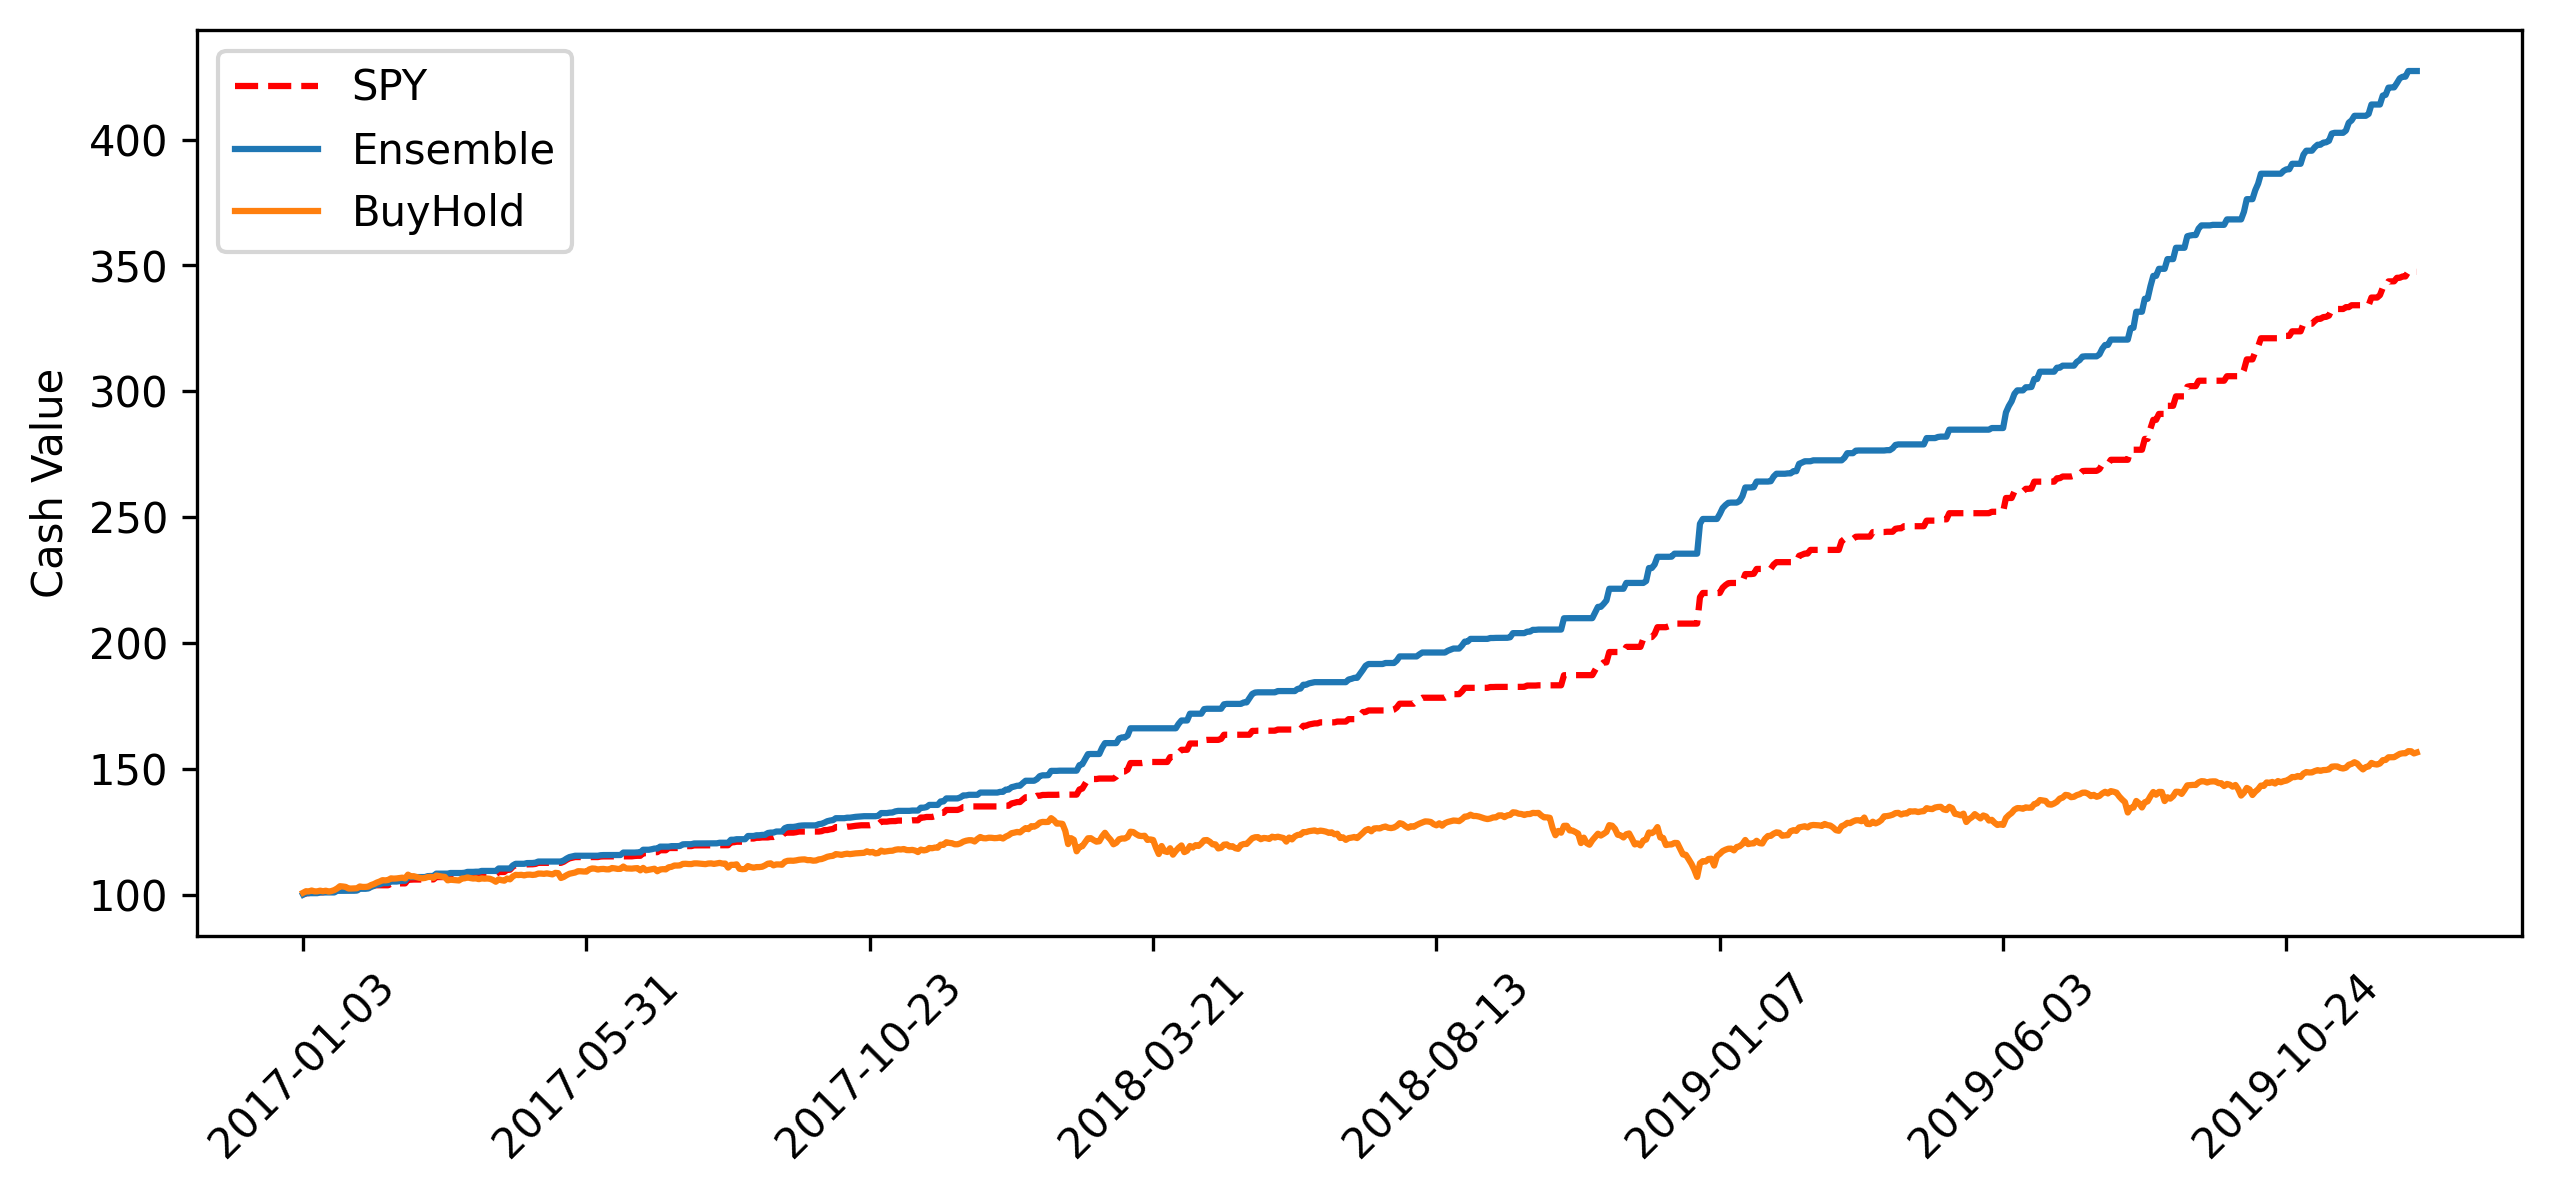

In [248]:
from matplotlib.pyplot import figure

figure(figsize=(10, 4), dpi=300)
# red dashes, blue squares and green triangles
plt.plot(spy_sim.Date, spy_sim['w4_return'], 'r--', label = 'SPY')
plt.plot(spy_sim['ensemble_return'], label = 'Ensemble')
plt.plot(spy_sim['buy_hold_return'], label = 'BuyHold')
plt.ylabel('Cash Value')
plt.xticks(np.arange(0, len(spy_sim)+1, 100),rotation=45)
plt.legend(loc="upper left")
plt.show()

Discussion: the w=2 and ensemble model performed well and beat the buy and hold strategy after the first year (2017 - 2018). There is even greater divergence in the second year of trading (2018 - 2019). The Ensemble seems to perform better in the long term (steeper slope than the other models).

In [220]:
msft_sim = msft[['Date','Return']]
msft_sim.head()

,Date,Return
0,2014-01-02,0.000000
1,2014-01-03,-0.006728
2,2014-01-06,-0.021133
3,2014-01-07,0.007750
4,2014-01-08,-0.017852


In [221]:
msft_test_sim = msft_test[['Date','w2 Pred','ensemble_pred']]
msft_test_sim.head()


,Date,w2 Pred,ensemble_pred
0,2017-01-03,-,-
1,2018-07-17,+,+
2,2017-11-01,+,-
3,2017-01-04,-,+
4,2019-08-22,-,+


In [222]:
msft_sim = msft_sim.merge(msft_test_sim, on='Date')
msft_sim

,Date,Return,w2 Pred,ensemble_pred
0,2017-01-03,0.007081,-,-
1,2017-01-04,-0.004474,-,+
2,2017-01-05,0.000000,+,+
3,2017-01-06,0.008668,+,+
4,2017-01-09,-0.003183,-,-
...,...,...,...,...
742,2019-12-24,-0.000191,-,-
743,2019-12-26,0.008197,+,+
744,2019-12-27,0.001828,+,+
745,2019-12-30,-0.008619,-,-


w=2 simulation

In [249]:
cash = 100
w2_return = []

for i in range(len(msft_sim)):
    pct = msft_sim.iloc[i]['Return']
    prediction = msft_sim.iloc[i]['w2 Pred']

    if prediction == '+':
        cash = cash * (1 + pct)
    else:
        cash = cash * (1)
    
    w2_return.append(cash)

ensemble simulation

In [250]:
cash = 100
ensemble_return = []

for i in range(len(msft_sim)):
    pct = msft_sim.iloc[i]['Return']
    prediction = msft_sim.iloc[i]['ensemble_pred']

    if prediction == '+':
        cash = cash * (1 + pct)
    else:
        cash = cash * (1)
    
    ensemble_return.append(cash)

buy and hold simulation

In [251]:
cash = 100
buy_hold_return = []

for i in range(len(msft_sim)):
    pct = msft_sim.iloc[i]['Return']
    cash = cash * (1 + pct)
    buy_hold_return.append(cash)

In [252]:
msft_sim['w2_return'] = w2_return
msft_sim['ensemble_return'] = ensemble_return
msft_sim['buy_hold_return'] = buy_hold_return
msft_sim

,Date,Return,w2 Pred,ensemble_pred,w2_return,ensemble_return,buy_hold_return
0,2017-01-03,0.007081,-,-,100.000000,100.000000,100.708086
1,2017-01-04,-0.004474,-,+,100.000000,99.552566,100.257484
2,2017-01-05,0.000000,+,+,100.000000,99.552566,100.257484
3,2017-01-06,0.008668,+,+,100.866776,100.415464,101.126491
4,2017-01-09,-0.003183,-,-,100.866776,100.415464,100.804641
...,...,...,...,...,...,...,...
742,2019-12-24,-0.000191,-,-,1424.311664,429.011354,262.771133
743,2019-12-26,0.008197,+,+,1435.986351,432.527841,264.924995
744,2019-12-27,0.001828,+,+,1438.611027,433.318409,265.409222
745,2019-12-30,-0.008619,-,-,1438.611027,433.318409,263.121763


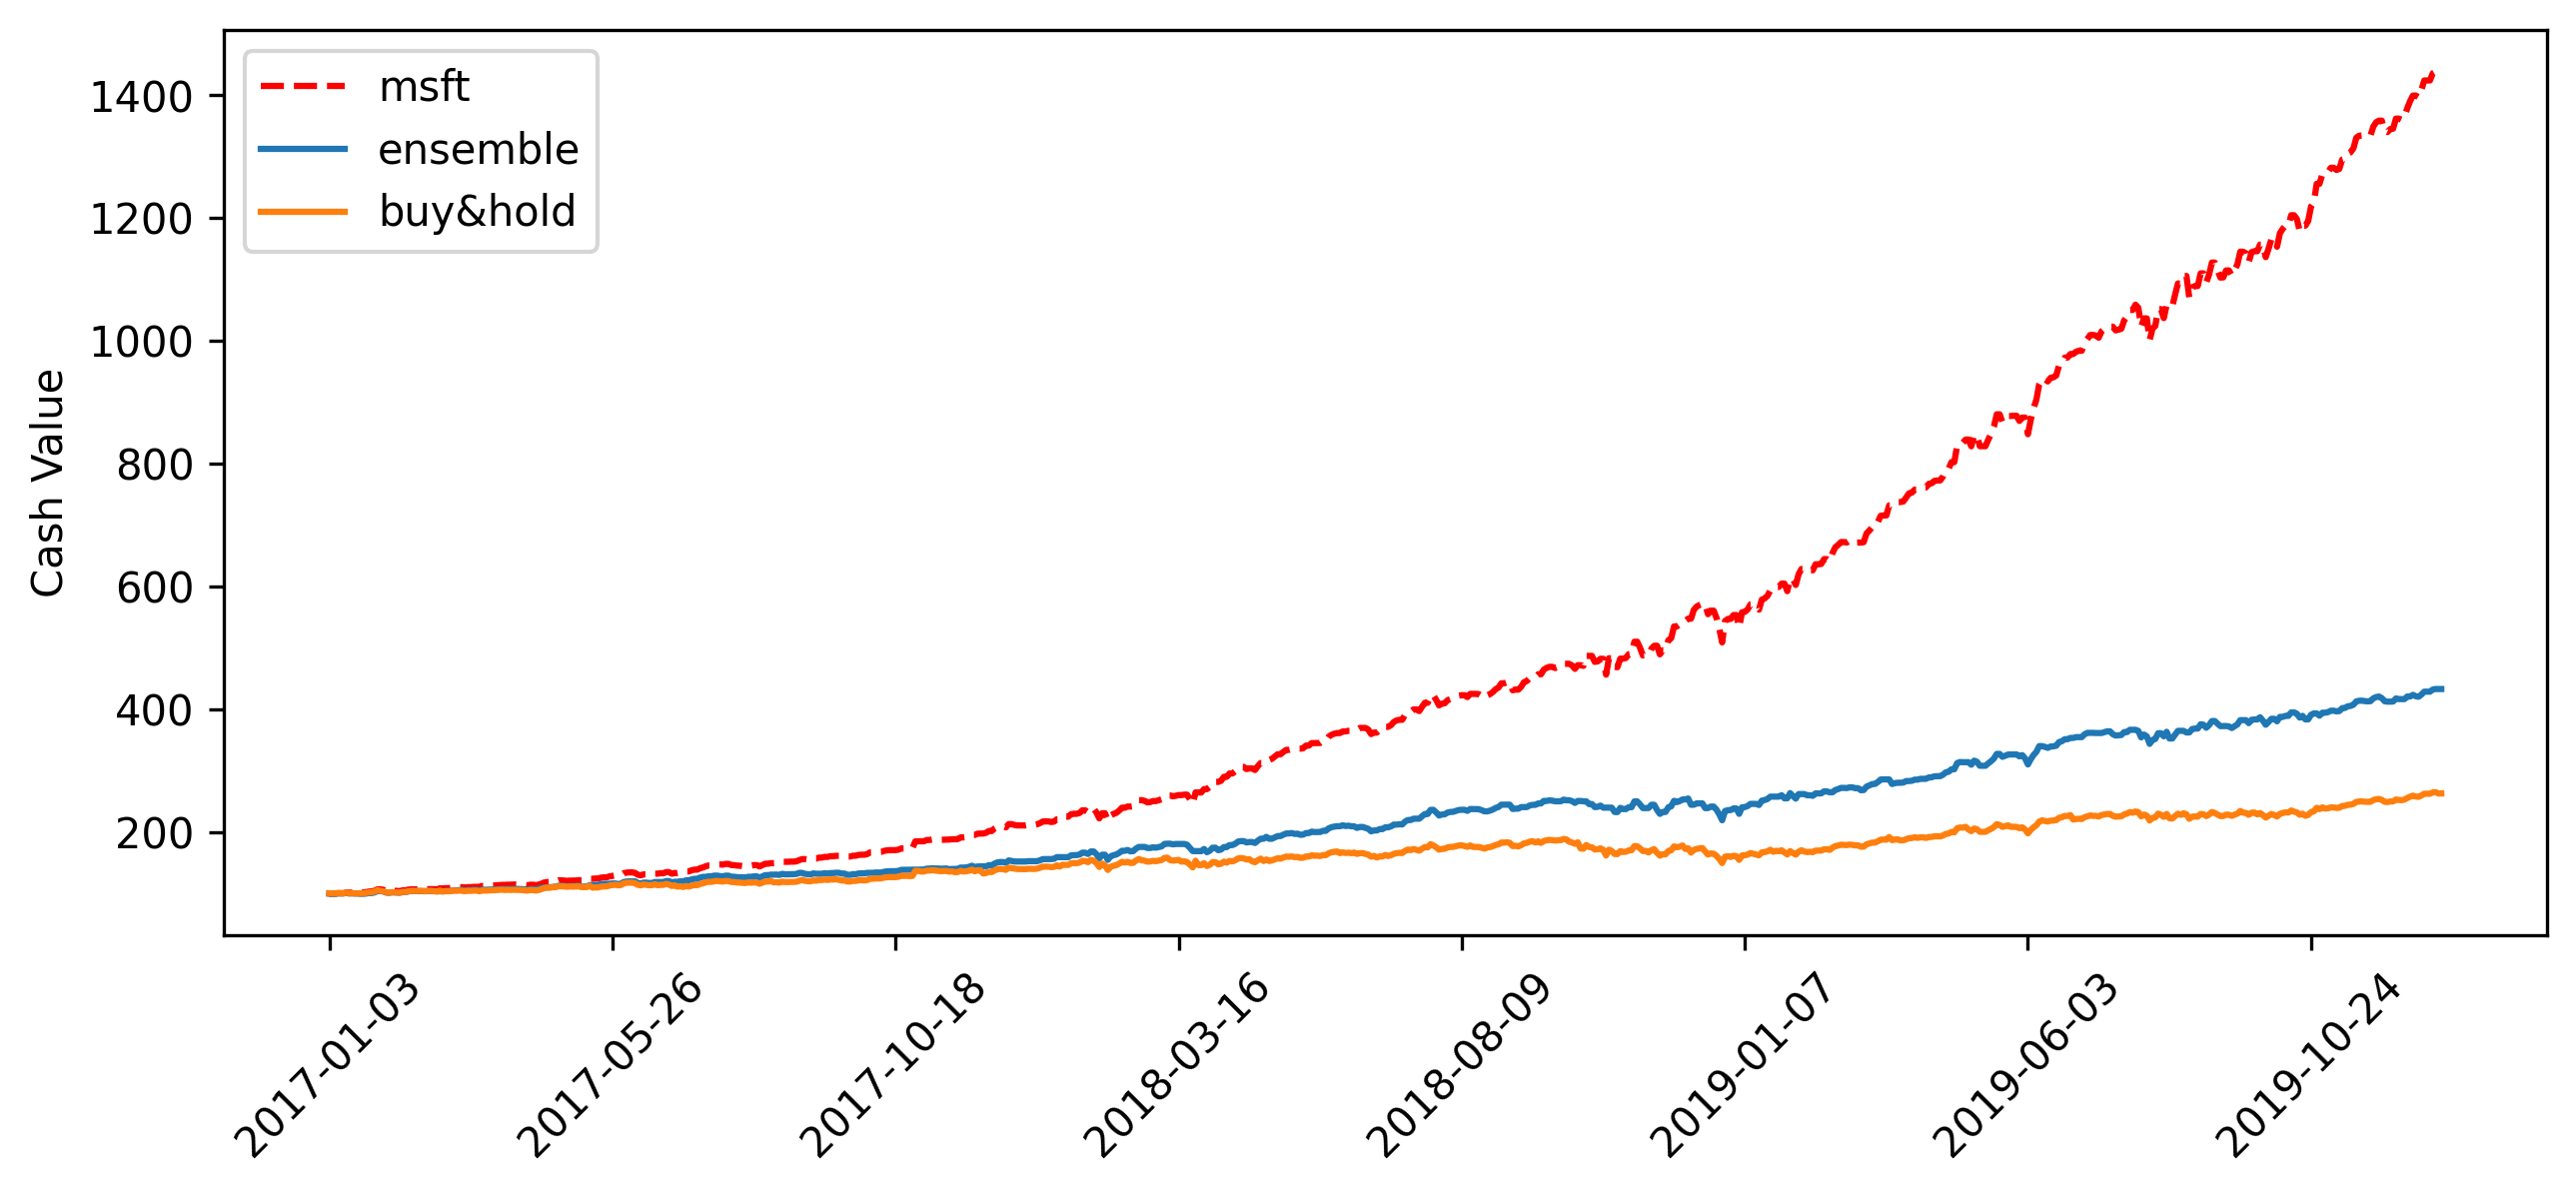

In [253]:
from matplotlib.pyplot import figure

figure(figsize=(10, 4), dpi=300)
# red dashes, blue squares and green triangles
plt.plot(msft_sim.Date, msft_sim['w2_return'], 'r--', label = 'msft')
plt.plot(msft_sim['ensemble_return'], label = 'ensemble')
plt.plot(msft_sim['buy_hold_return'], label = 'buy&hold')
plt.ylabel('Cash Value')
plt.xticks(np.arange(0, len(msft_sim)+1, 100),rotation=45)
plt.legend(loc="upper left")
plt.show()

Discussion: the w=4  performed well and beat the ensemble and buy and hold strategy after the first year (2018 - 2019). The w=4 seems to grow sharply after 2019. The ensemble and buy and hold strategies performed similarly across all trading periods.